In [1]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 487.6 kB/s eta 0:00:06
      --------------------------------------- 0.0/3.0 MB 487.6 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 581.

In [101]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [102]:
# Download historical stock data for Netflix
ticker = "NFLX"
data = yf.download(ticker, start="2021-01-01", end="2021-12-31")


[*********************100%%**********************]  1 of 1 completed


In [103]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,539.000000,540.799988,515.090027,522.859985,522.859985,4444400
2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900
2021-01-06,511.970001,513.099976,499.500000,500.489990,500.489990,5346200
2021-01-07,508.279999,516.440002,506.420013,508.890015,508.890015,3686400
2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900
...,...,...,...,...,...,...
2021-12-23,616.400024,616.880005,607.570007,614.090027,614.090027,1621100
2021-12-27,615.000000,615.000000,609.250000,613.119995,613.119995,2061500
2021-12-28,614.950012,618.409973,609.690002,610.710022,610.710022,1882800


In [104]:
# Use the Open Stock Price Column to Train Your Model.
training_set = data.iloc[:, 1:2].values
print(training_set)
print(training_set.shape)

[[540.79998779]
 [526.7800293 ]
 [513.09997559]
 [516.44000244]
 [513.23999023]
 [510.73001099]
 [501.08999634]
 [512.34997559]
 [514.5       ]
 [506.32000732]
 [509.25      ]
 [593.28997803]
 [588.75      ]
 [583.98999023]
 [569.75      ]
 [567.98999023]
 [556.41998291]
 [553.15002441]
 [541.        ]
 [545.05999756]
 [555.47998047]
 [550.47998047]
 [559.47998047]
 [554.44000244]
 [555.        ]
 [566.        ]
 [566.65002441]
 [565.92999268]
 [561.25      ]
 [563.63000488]
 [555.25      ]
 [550.        ]
 [548.98999023]
 [541.78997803]
 [548.53997803]
 [556.84997559]
 [556.47998047]
 [553.09002686]
 [552.14001465]
 [556.98999023]
 [548.01000977]
 [531.5       ]
 [517.76000977]
 [518.84002686]
 [513.10998535]
 [518.9699707 ]
 [530.23999023]
 [526.51000977]
 [520.72998047]
 [533.41998291]
 [528.36999512]
 [517.90002441]
 [513.19000244]
 [529.30999756]
 [543.11999512]
 [534.41998291]
 [518.5300293 ]
 [508.72000122]
 [518.        ]
 [514.40997314]
 [528.13000488]
 [540.5       ]
 [542.84

In [105]:
# Normalize Dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = scaler.fit_transform(training_set)


In [106]:
# Creating X_train and y_train Data Structures.
X_train = []
y_train = []
for i in range(60, len(scaled_training_set)):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [107]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [108]:
# Building the Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))


In [109]:
# Fitting the model
model.compile(optimizer='adam', loss="mean_squared_error")
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)


Epoch 1/100
6/6 - 15s - loss: 0.1213 - 15s/epoch - 3s/step
Epoch 2/100
6/6 - 1s - loss: 0.0428 - 508ms/epoch - 85ms/step
Epoch 3/100
6/6 - 1s - loss: 0.0368 - 539ms/epoch - 90ms/step
Epoch 4/100
6/6 - 1s - loss: 0.0276 - 514ms/epoch - 86ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0289 - 495ms/epoch - 83ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0215 - 441ms/epoch - 74ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0208 - 450ms/epoch - 75ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0210 - 382ms/epoch - 64ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0209 - 400ms/epoch - 67ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0202 - 414ms/epoch - 69ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0174 - 389ms/epoch - 65ms/step
Epoch 12/100
6/6 - 0s - loss: 0.0175 - 435ms/epoch - 73ms/step
Epoch 13/100
6/6 - 0s - loss: 0.0187 - 447ms/epoch - 75ms/step
Epoch 14/100
6/6 - 0s - loss: 0.0177 - 418ms/epoch - 70ms/step
Epoch 15/100
6/6 - 1s - loss: 0.0204 - 553ms/epoch - 92ms/step
Epoch 16/100
6/6 - 1s - loss: 0.0200 - 534ms/epoch - 89ms/step
Epoc

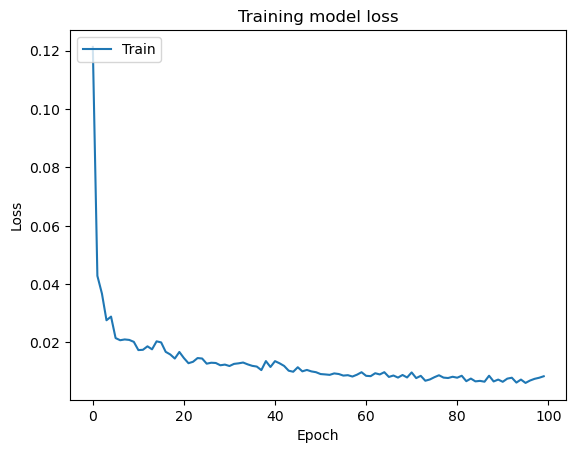

In [110]:
# Plotting the training loss
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [111]:
# Load test data
test_data = yf.download(ticker, start="2022-01-01", end="2023-12-31")


[*********************100%%**********************]  1 of 1 completed


In [112]:
actual_stock_price=test_data.iloc[:,1:2].values
actual_stock_price

array([[609.98999023],
       [600.40997314],
       [592.84002686],
       [563.35998535],
       [553.42999268],
       [543.69000244],
       [543.90997314],
       [544.27001953],
       [540.78997803],
       [538.36999512],
       [521.75      ],
       [523.21002197],
       [526.64001465],
       [409.1499939 ],
       [387.26000977],
       [387.70999146],
       [382.66000366],
       [394.79998779],
       [387.        ],
       [427.70001221],
       [458.48001099],
       [451.98001099],
       [429.26000977],
       [412.76998901],
       [412.3500061 ],
       [406.60998535],
       [412.98001099],
       [408.        ],
       [411.60998535],
       [409.35998535],
       [409.16000366],
       [401.55999756],
       [399.10998535],
       [402.86999512],
       [392.42001343],
       [386.        ],
       [390.73001099],
       [391.29000854],
       [397.75      ],
       [395.        ],
       [389.22000122],
       [386.11999512],
       [374.82000732],
       [362

In [113]:
# Prepare input data for model
timestamp=60
dataset_total=pd.concat((data['Open'],test_data['Open']),axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - timestamp:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test = []
length = len(test_data)
for i in range(timestamp, length):
    X_test.append(inputs[i-timestamp:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [114]:
# Make predictions
y_predict = model.predict(X_test)
y_predict


14/14 [==============================] - 3s 35ms/step


array([[ 0.6356818 ],
       [ 0.643907  ],
       [ 0.6448662 ],
       [ 0.63787585],
       [ 0.6171323 ],
       [ 0.5831047 ],
       [ 0.53855693],
       [ 0.48855266],
       [ 0.44000906],
       [ 0.39687127],
       [ 0.35805774],
       [ 0.32335186],
       [ 0.2925059 ],
       [ 0.2664212 ],
       [ 0.22635908],
       [ 0.16068551],
       [ 0.06880899],
       [-0.0426318 ],
       [-0.16375741],
       [-0.28394935],
       [-0.3929534 ],
       [-0.4800279 ],
       [-0.53553563],
       [-0.5564466 ],
       [-0.5468653 ],
       [-0.514927  ],
       [-0.47087938],
       [-0.42330736],
       [-0.37850785],
       [-0.34022665],
       [-0.31151506],
       [-0.29270107],
       [-0.28229296],
       [-0.2787165 ],
       [-0.2806798 ],
       [-0.2871549 ],
       [-0.29755157],
       [-0.31315136],
       [-0.33318555],
       [-0.3548686 ],
       [-0.3749587 ],
       [-0.39103946],
       [-0.40207997],
       [-0.4093648 ],
       [-0.41558284],
       [-0

In [115]:
predicted_price = scaler.inverse_transform(y_predict)

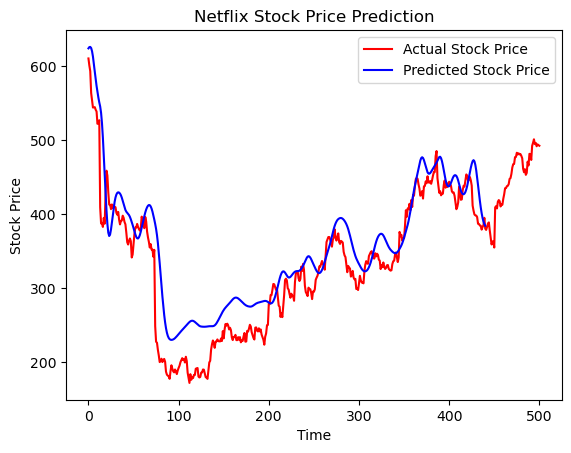

In [116]:
# Plotting the predicted vs actual prices
plt.plot(actual_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='blue', label='Predicted Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()